## Explore dataset

In [1]:
!ls data/facial-keypoints-detection

IdLookupTable.csv    test.csv             training.csv
SampleSubmission.csv test.zip             training.zip


In [2]:
TRAINING_DATASET_PATH = "data/facial-keypoints-detection/training.csv"

## Make torch dataloader

In [3]:
from dataset import KeyPointsDataset
from dataset import Sample
from dataset.transforms import Normalize, ToTensor
    

full_dataset = KeyPointsDataset(TRAINING_DATASET_PATH, transform=lambda x: ToTensor()(x))

In [4]:
len(full_dataset)

2140

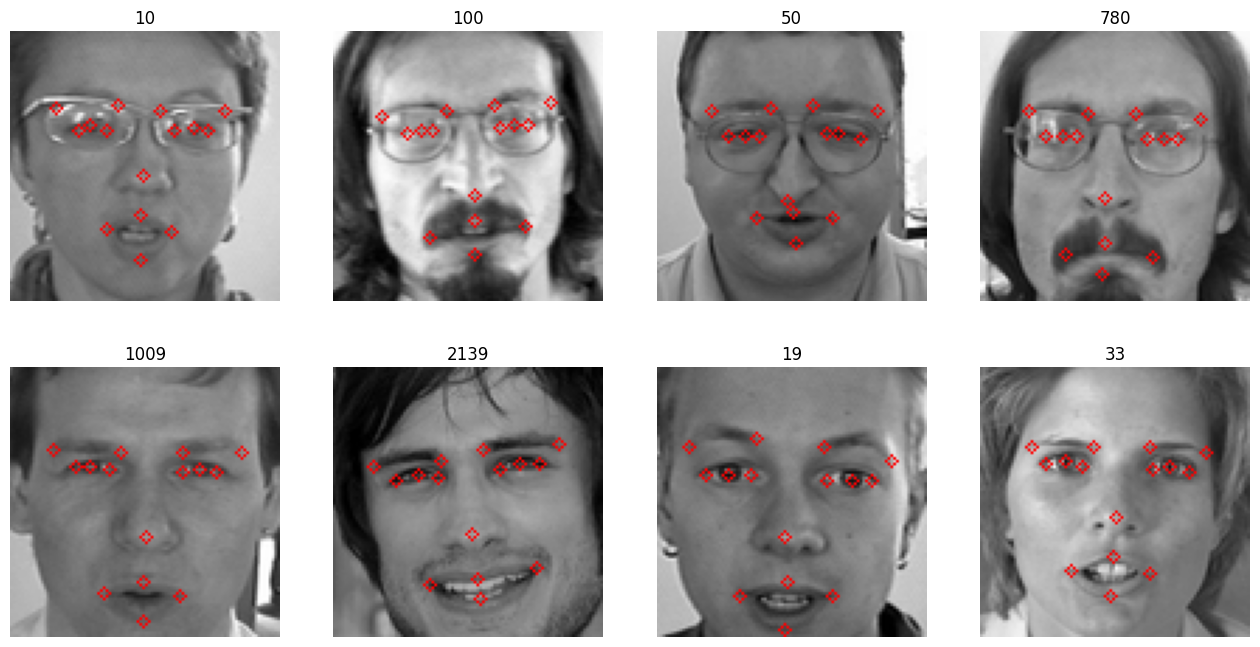

In [5]:
from dataset.visualization import visualize_sample


target_ids = [10, 100, 50, 780, 1009, 2139, 19, 33]

samples = [
    Sample.decode(full_dataset[i], f"{i}") for i in target_ids
]

visualize_sample(samples, figsize=(16, 8))

In [6]:
samples[0].image.dtype, samples[0].image.shape

(dtype('uint8'), (96, 96, 3))

In [7]:
import torch


dataloader = torch.utils.data.DataLoader(full_dataset, batch_size=4, shuffle=True, num_workers=0)

In [8]:
from model.keypoints_regressor import KeypointsRegressor
from dataset.sample import Sample


model = KeypointsRegressor(
    backbone='mobilenet2',
    keypoints_names=Sample.keypoints_names(),
    target_resolution=Sample.image_shape()[:2],
    pretrained_backbone=True
)

model.eval()


/Users/iolkhovsky/Documents/repos/kaggle_sandbox/facial_keypoints/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


KeypointsRegressor(
  (preprocessor): Preprocessor()
  (core): ModelCore(
    (backbone): MobileNetV2(
      (features): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): InvertedResidual(
          (conv): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
            )
            (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (2): InvertedResidual(
          (

In [9]:
it = iter(dataloader)
batch = next(it)
imgs_batch, targets_batch = batch['image'], batch['keypoints']
imgs_batch.shape, imgs_batch.dtype

(torch.Size([4, 96, 96, 3]), torch.uint8)

In [10]:
model(imgs_batch)

/Users/iolkhovsky/Documents/repos/kaggle_sandbox/facial_keypoints/venv/lib/python3.8/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[47.9140, 19.7364, 74.5663, 33.1005, 13.5354, 75.3752, 39.5102, 12.9471,
         58.5138, 58.1074, 53.4600, 52.5053, 11.9446, 28.9134, 12.3190, 70.7451,
         23.1143, 66.6483, 66.2528, 36.6387, 38.0181, 68.2169, 12.7490, 80.7575,
         89.1505, 32.7873, 23.8638, 30.6162, 16.2322, 57.9180],
        [74.5721, 41.9822, 66.1205, 33.7424, 19.6515, 51.2573, 58.5725, 47.0089,
         71.0706, 54.0864, 39.0051, 73.8194, 28.1937, 41.8648, 49.9764, 62.4441,
         52.3297, 75.1614, 83.8860, 44.2409, 23.3740, 87.9875, 42.7619, 56.9011,
         61.2242, 58.0754, 37.9246, 56.5049, 11.6131, 27.9058],
        [63.0740, 26.8066, 56.0787, 49.1335, 21.8129, 58.4063, 40.1402, 22.8008,
         56.8885, 31.7455, 49.4374, 84.7278, 18.5537, 44.1606, 75.7462, 70.7974,
         55.0740, 63.6759, 71.9691, 35.4162, 36.7676, 76.8226, 17.7148, 78.8435,
         71.1650, 50.6457, 61.1062, 33.9256,  4.0948, 34.9781],
        [73.7735, 35.8872, 71.4450, 39.7151, 18.8351, 54.3053, 45.7498, 33.7786

In [11]:
targets_batch

tensor([[37.1358, 37.8044, 54.7176, 46.8616, 39.2669, 62.5784, 36.3367, 30.3455,
         24.7227, 40.6044, 74.1636, 31.4110, 69.3689, 44.9967, 40.8652, 75.3647,
         36.3367, 23.6853, 27.2794, 18.0913, 77.3606, 59.6480, 31.2753, 82.5576,
         27.2252, 58.7484, 38.7341, 68.4391, 84.8196, 43.6646],
        [37.5224, 38.9127, 56.1482, 47.0615, 37.8549, 58.0373, 36.8570, 28.7682,
         28.0432, 41.7397, 79.9292, 31.9280, 74.7740, 47.0615, 37.8549, 75.1665,
         37.8670, 21.4731, 32.0343, 14.4663, 79.7630, 64.3569, 31.7018, 82.6499,
         26.7041, 55.9610, 37.0233, 67.1839, 82.2575, 47.5603],
        [40.1137, 40.2992, 59.5779, 57.7173, 39.4858, 57.8523, 38.2302, 29.0768,
         30.2987, 43.2273, 75.6662, 32.4666, 77.7468, 51.0744, 38.6226, 74.1759,
         39.3467, 20.8883, 32.1091, 13.5084, 74.9883, 63.8147, 30.9143, 79.5026,
         31.8571, 58.3571, 38.0994, 64.7323, 78.6117, 51.1679],
        [37.8994, 34.3594, 57.8194, 45.8520, 38.6657, 60.4080, 36.7509, 27.4646

In [12]:
model(imgs_batch, ret_raw=False)

[{'right_eye_inner_corner': (47.913994, 19.736431),
  'nose_tip': (74.566315, 33.100487),
  'left_eye_inner_corner': (13.53541, 75.375244),
  'right_eye_center': (39.510162, 12.947053),
  'right_eyebrow_inner_end': (58.513824, 58.10736),
  'mouth_right_corner': (53.460007, 52.50531),
  'mouth_center_top_lip': (11.944618, 28.91338),
  'left_eye_outer_corner': (12.319021, 70.745094),
  'right_eye_outer_corner': (23.11426, 66.64832),
  'right_eyebrow_outer_end': (66.252815, 36.638702),
  'mouth_left_corner': (38.018112, 68.21689),
  'left_eyebrow_outer_end': (12.748995, 80.7575),
  'left_eyebrow_inner_end': (89.15053, 32.787323),
  'left_eye_center': (23.863817, 30.616154),
  'mouth_center_bottom_lip': (16.232166, 57.91796)},
 {'right_eye_inner_corner': (74.57207, 41.982224),
  'nose_tip': (66.12045, 33.74237),
  'left_eye_inner_corner': (19.651512, 51.257263),
  'right_eye_center': (58.572533, 47.00895),
  'right_eyebrow_inner_end': (71.07059, 54.08638),
  'mouth_right_corner': (39.00508

In [13]:
from dataset.visualization import visualize_training

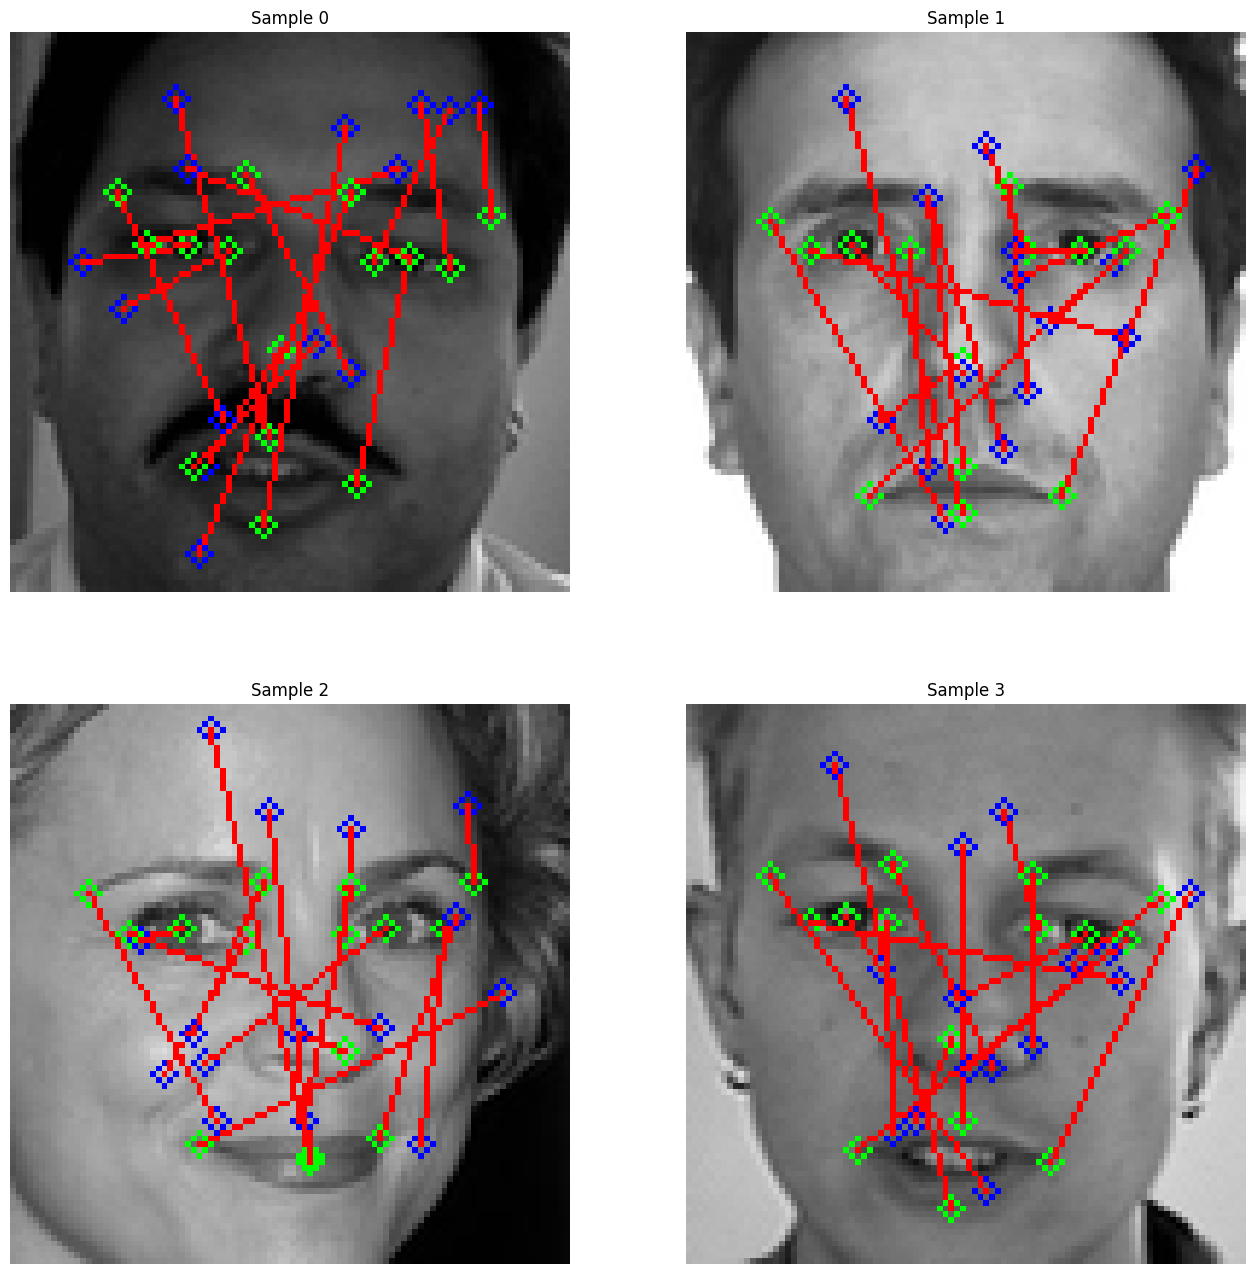

In [14]:
visualize_training(
    imgs_batch,
    model(imgs_batch, ret_raw=True),
    targets_batch,
)

## Train

In [15]:
import torch.optim as optim


model.train()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data["image"].float(), data["keypoints"].float()
        print(f"inputs.shape: {inputs.shape}")
        print(f"labels.shape: {labels.shape}")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        print(f"outputs.shape: {outputs.shape}")
        loss = criterion(outputs, labels)
        print(f"loss: {loss}")
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 23.83421516418457
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.241207122802734
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.315871238708496
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.460830688476562
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 17.168628692626953
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 18.07839012145996
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 12.059233665466309
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: to

inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 14.24730396270752
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 15.127145767211914
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 6.494528770446777
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.092198371887207
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.639124870300293
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 8.491020202636719
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.066760063171387
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torc

outputs.shape: torch.Size([4, 30])
loss: 18.947111129760742
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.1659626960754395
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 8.490200996398926
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 23.068937301635742
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 8.347616195678711
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.826899528503418
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.1234049797058105
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.4741268157958

inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 6.983837604522705
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.70052719116211
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.679430961608887
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.568965911865234
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.105731964111328
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.456074714660645
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.366713523864746
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch

outputs.shape: torch.Size([4, 30])
loss: 11.213109970092773
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.77250862121582
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 14.463852882385254
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.03843879699707
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.68037223815918
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 14.883233070373535
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.361984252929688
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 37.18447494506836
i

inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 29.594837188720703
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.763447761535645
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 18.95209503173828
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 5.271084308624268
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.245988845825195
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 8.816349983215332
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 16.000621795654297
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: tor

outputs.shape: torch.Size([4, 30])
loss: 9.708587646484375
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 12.406981468200684
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 24.11262321472168
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.09279727935791
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 12.248013496398926
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 14.798685073852539
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.125333786010742
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.223422527313232


outputs.shape: torch.Size([4, 30])
loss: 8.848295211791992
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 6.269767761230469
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 16.250450134277344
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 9.100056648254395
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 6.282387733459473
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.159496307373047
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 10.279607772827148
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 11.668609619140625

inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 12.301362991333008
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 13.646612167358398
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 31.080549240112305
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 16.534915924072266
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 7.15349817276001
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 19.470502853393555
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: torch.Size([4, 30])
outputs.shape: torch.Size([4, 30])
loss: 12.932150840759277
inputs.shape: torch.Size([4, 96, 96, 3])
labels.shape: to

KeyboardInterrupt: 

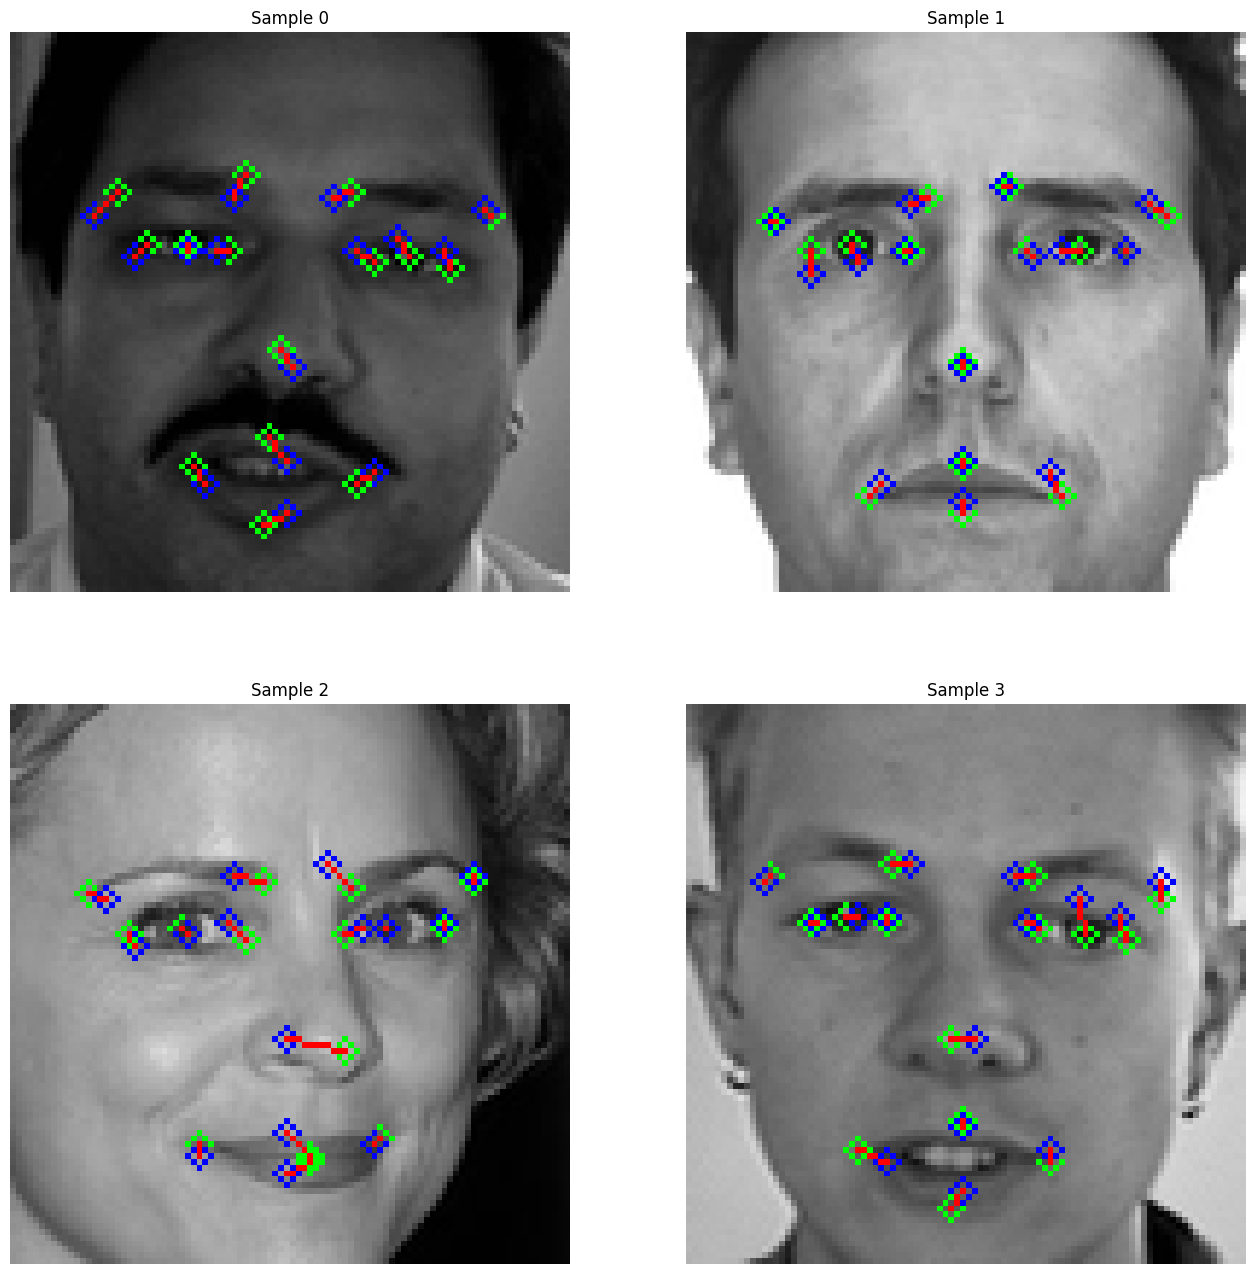

In [21]:
model.eval()

visualize_training(
    imgs_batch,
    model(imgs_batch, ret_raw=True),
    targets_batch,
)